In [77]:
import matplotlib.pyplot as plt
import ast
import re

txt_file = "Task2_data/output/output.txt"

iteration_list = []
distance_list = []
line_list = []
centroids_list = []
result_list = []

with open(txt_file, 'r') as f:
    for line in f:
        
        if "iteration: " in line:
            # SSE in each iteration
            parsed_line = line.rstrip()
            line_split = parsed_line.split(' ')
            line_list.append(parsed_line)
            iteration = line_split[1]
            iteration_list.append(int(line_split[1]))
            distance = line_split[3]
            if 'E' in distance:
                distance_split = distance.split('E')
                num = ast.literal_eval(distance_split[0])
                power = int(distance_split[1])
                distance_value = num *pow(10, power)
                distance_list.append(distance_value)
            else:
                distance_list.append(ast.literal_eval(line_split[3]))
        if "centroids are:" in line:
            # centroids in each iteration
            centroids_list = []
            parsed_line = line.rstrip()
            iteration_centroids = []
            line_split = parsed_line.split(":")
            centroids = line_split[1]
            # centroids_split = centroids.split("[(,)]")
            centroids_split = re.compile("[(,)]").split(centroids)
            centroids_split = [x for x in centroids_split if x != ""]
            # print("centroids: " + centroids)
            # print("size is " + str(len(centroids_split)))
            for i in range(45):
                centroids_list.append([int(centroids_split[2*i]), int(centroids_split[2*i+1])])
        if "centroid: " in line:
            # final result
            parsed_line = line.rstrip()
            line_split = parsed_line.split(" ")
            raw_centroid = line_split[1]
            size = int(line_split[3])
            raw_centroid_split = raw_centroid.split(",")
            centroid_x = int(raw_centroid_split[0].replace("(", ""))
            centroid_y = int(raw_centroid_split[1].replace(")", ""))
            result_list.append([centroid_x, centroid_y, size])

Text(0, 0.5, 'score')

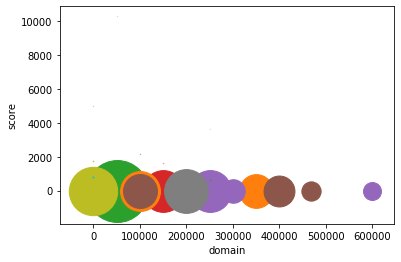

In [78]:
cluster_size_fig = plt.figure()
for i in range(len(result_list)):
    point = result_list[i]
    plt.scatter(point[0], point[1], s=point[2]/100.0)
plt.xlabel("domain")
plt.ylabel("score")

Text(0, 0.5, 'score')

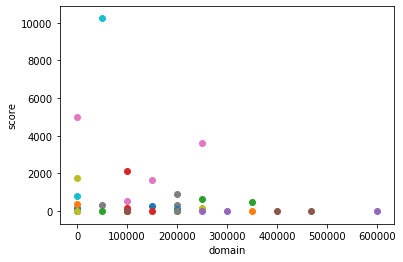

In [79]:
cluster_fig = plt.figure()
for i in range(len(result_list)):
    point = result_list[i]
    plt.scatter(point[0], point[1])
plt.xlabel("domain")
plt.ylabel("score")

Text(0, 0.5, 'SSE')

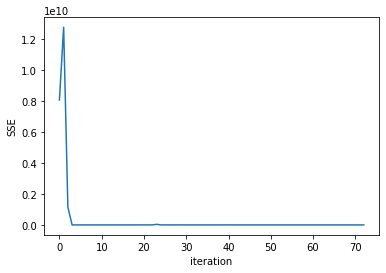

In [80]:
plt.plot(iteration_list, distance_list)
plt.xlabel("iteration")
plt.ylabel("SSE")

In [81]:
# result statistics analysis
size_list = []
domain_list = []
score_list = []
for i in range(len(result_list)):
    result = result_list[i]
    domain_list.append(result[0])
    score_list.append(result[1])
    size_list.append(result[2])

In [82]:
# largest cluster
result_list[size_list.index(max(size_list))]

[50000, 2, 383473]

In [83]:
# highest avg score
result_list[score_list.index(max(score_list))]

[50000, 10271, 2]

Text(0, 0.5, '#clusters')

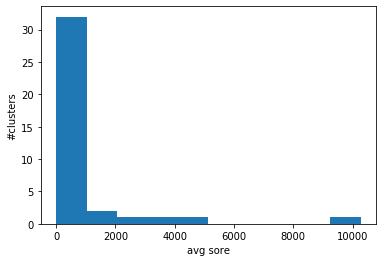

In [84]:
# histogram of scores
score_hist_figure = plt.figure()
plt.hist(score_list)
plt.xlabel("avg sore")
plt.ylabel("#clusters")